In [1]:
import Pkg; 

if split(pwd(),"/")[end] == "utility"
    cd(joinpath(@__DIR__, "../../../MorphoMolMonteCarlo/"))
    Pkg.activate("Project.toml")
end

using MorphoMol

if split(pwd(), "/")[end] == "MorphoMolMonteCarlo"
    cd(joinpath(@__DIR__, "../MMMCNotebooks/"))
    Pkg.activate("Project.toml")
end

using PyCall
using JLD2
using LinearAlgebra
using Rotations
using CairoMakie

  Activating project at `~/Doktor/Code/MMMC/MorphoMolMonteCarlo`
  Activating project at `~/Doktor/Code/MMMC/MMMCNotebooks`
Precompiling CairoMakie
  ✓ StatsFuns → StatsFunsChainRulesCoreExt
  ✓ Distributions → DistributionsChainRulesCoreExt
  ✓ KernelDensity
  ✓ Makie
  ✓ CairoMakie
  5 dependencies successfully precompiled in 72 seconds. 219 already precompiled.
[ Info: Precompiling CairoMakie [13f3f980-e62b-5c42-98c6-ff1f3baf88f0]
Precompiling DistributionsTestExt
  ✓ Distributions → DistributionsTestExt
  1 dependency successfully precompiled in 6 seconds. 43 already precompiled.
[ Info: Precompiling DistributionsTestExt [ffbe0ea5-a612-5ff7-aaf5-cac02eef3019]
┌ Warning: Module Distributions with build ID fafbfcfd-cb60-831b-0000-acb40abd42de is missing from the cache.
│ This may mean Distributions [31c24e10-a181-5473-b8eb-7969acd0382f] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1948
[ Info: Skipping precompilation since __precompile__(

In [2]:
py"""
import oineus as oin
import numpy as np
import torch
import diode

def calculate_total_persistence(points):
    points = np.asarray(points)
    simplices = diode.fill_alpha_shapes(points)
    fil = oin.Filtration_double([oin.Simplex_double(s[0], s[1]) for s in simplices])
    # no cohomology
    dualize = False
    # create VRU decomposition object, does not perform reduction yet
    dcmp = oin.Decomposition(fil, dualize)
    rp = oin.ReductionParams()
    rp.compute_u = rp.compute_v = True
    rp.n_threads = 1
    # perform reduction
    dcmp.reduce(rp)
    # now we can acess V, R and U
    # indices are sorted_ids of simplices == indices in fil.cells()
    V = dcmp.v_data
    simplices = fil.simplices()
    dim=1
    dgm_dim = dcmp.diagram(fil, include_inf_points=False)[dim]
    return sum([e[1] - e[0] for e in dgm_dim])
"""

function calculate_total_persistence(points::Vector{Vector{Float64}})
    py"calculate_total_persistence"(points)
end

calculate_total_persistence (generic function with 1 method)

In [7]:
dists = 0.81:0.001:1.2

xs = [x for x in dists]
ps = [calculate_total_persistence([[0.0, 0.0, 0.0], [1.0, 0.0, 0.0], [0.5, 0.0, sqrt(0.75)], [0.5, x, 1.0/(2.0*sqrt(3))]]) for x in xs];

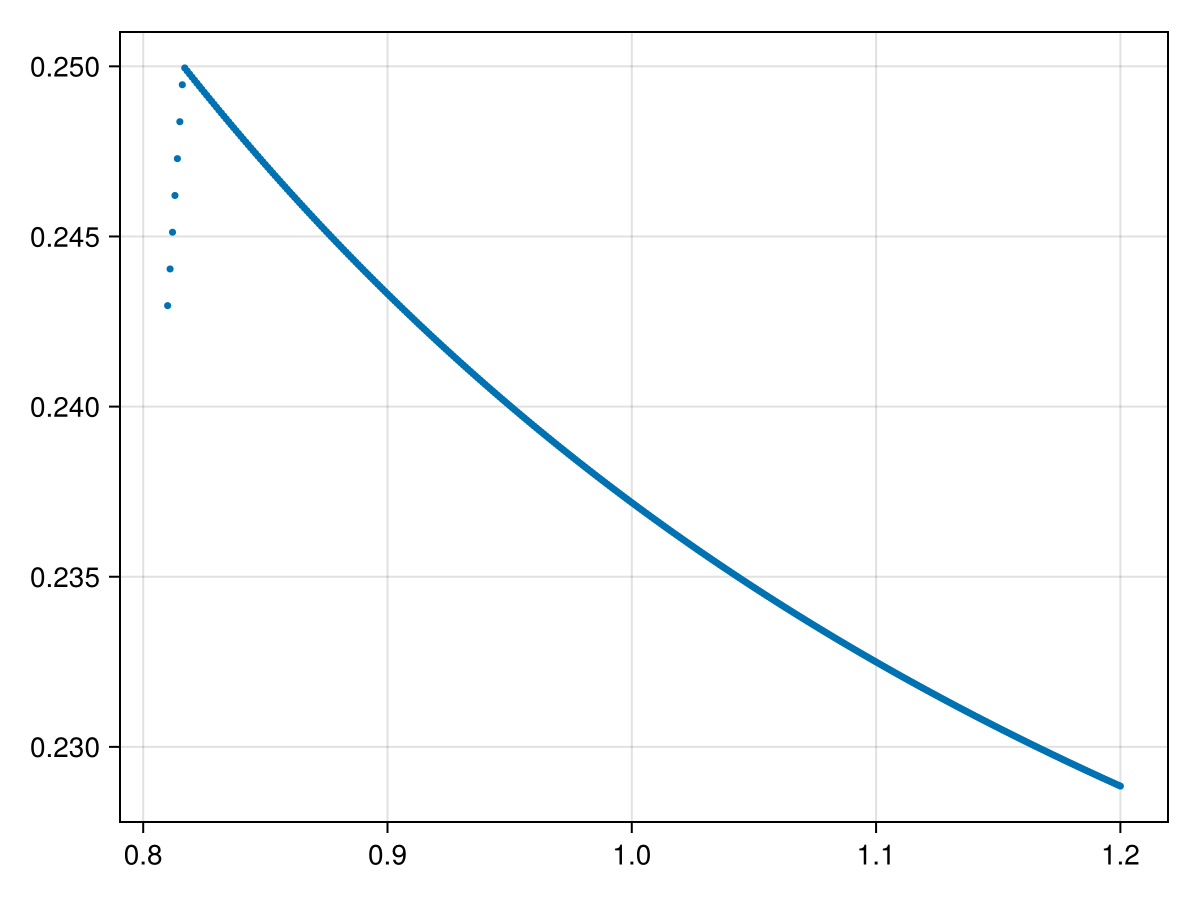

In [8]:
f = Figure()
tp_ax = Axis(f[1, 1])

ms = 5
scatter!(tp_ax, xs, ps, markersize = ms)

f